In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Monte Carlo Methods

In [2]:
N = 10000
T = 1

mu = 0
sigma = 0.3
dt = T / N

euler = np.zeros(N)
analytic = np.zeros(N)
rv = np.random.normal(mu, sigma, N)

In [3]:
# Set Initial Value
euler[0] = 100

for i in range(1, N):
    
    euler[i] = euler[i - 1] + (mu * euler[i - 1] * dt) + (sigma * euler[i - 1] * rv[i] * np.sqrt(dt))
    
B = np.cumsum(rv * np.sqrt(dt))
analytic = 100 * np.exp((mu - 0.5 * sigma**2) * dt + sigma * B)

Text(0.5, 1.0, 'Monte Carlo Path')

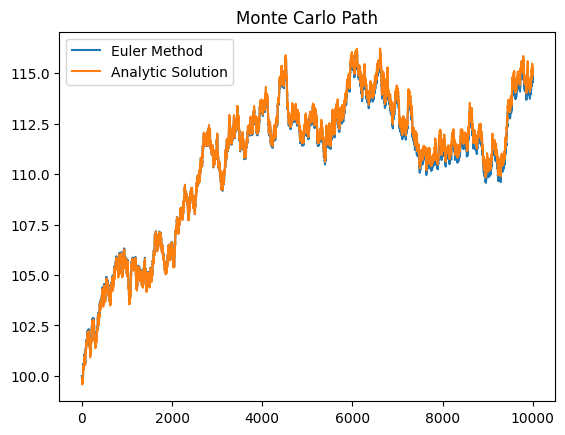

In [4]:
plt.plot(euler, label = "Euler Method")
plt.plot(analytic, label = "Analytic Solution")
plt.legend(loc = 'best')
plt.title("Monte Carlo Path")

Text(0.5, 1.0, 'Residual')

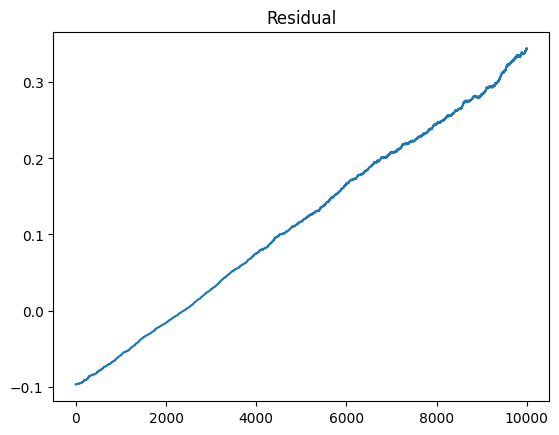

In [5]:
plt.plot(analytic - euler)
plt.title("Residual")

## Monte Carlo Methods Results 

#### As expected, the Euler method is very close when compared to the analytical solution of Geometric Brownian Motion. 

#### However, over time the residual grows and the two time series grow apart. 

#### This is because the error should grow as time increases

## Variation of Brownian Motion

In [6]:
total_variation_arr = np.zeros(4)
quadratic_variation_arr = np.zeros(4)

In [7]:
def get_total_varitation(arr):
    """Converges to Infinity"""
    
    L = len(arr)
    variation = 0
    
    for i in range(1, L):
        variation += np.abs(arr[i] - arr[i - 1])
        
    return variation

In [8]:
def get_quadratic_variation(arr):
    """Converges to T"""
    
    L = len(arr)
    variation = 0
    
    for i in range(1, L):
        variation += (arr[i] - arr[i - 1])**2
        
    return variation

In [9]:
T = 1
dt = np.array([0.1, 0.01, 0.001, 0.0001])

In [10]:
L = len(dt)
myData = []

for i in range(L):
    
    n = int(T / dt[i])
    analytic = np.zeros(n)
    analytic[0] = 100
    rv = np.random.normal(mu, sigma, n)
    
    for j in range(1, n):
        analytic[j] = analytic[j - 1] * np.exp((mu - 0.5 * sigma**2) * dt[i] + sigma * rv[j] * np.sqrt(dt[i]))  
        
    myData.append(analytic)

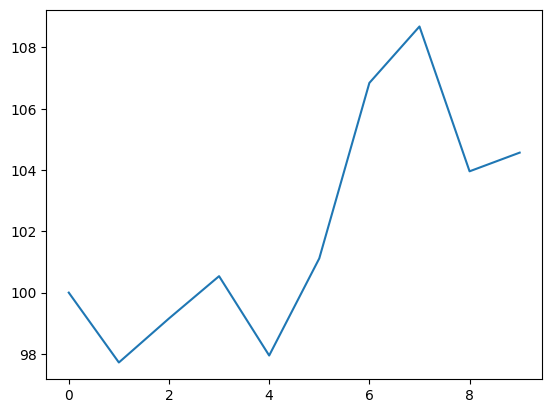

In [11]:
plt.plot(myData[0])

In [12]:
total_variation = get_total_varitation(myData[0])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[0])
print("Quadratic Variation: ", quadratic_variation)

total_variation_arr[0] = total_variation
quadratic_variation_arr[0] = quadratic_variation

Total Variation:  23.754598709800064
Quadratic Variation:  84.77750533375628


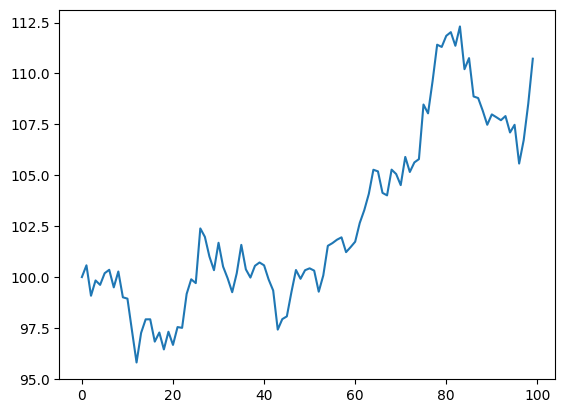

In [13]:
plt.plot(myData[1])

In [14]:
total_variation = get_total_varitation(myData[1])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[1])
print("Quadratic Variation: ", quadratic_variation)

total_variation_arr[1] = total_variation
quadratic_variation_arr[1] = quadratic_variation

Total Variation:  78.452065430681
Quadratic Variation:  98.26361617255472


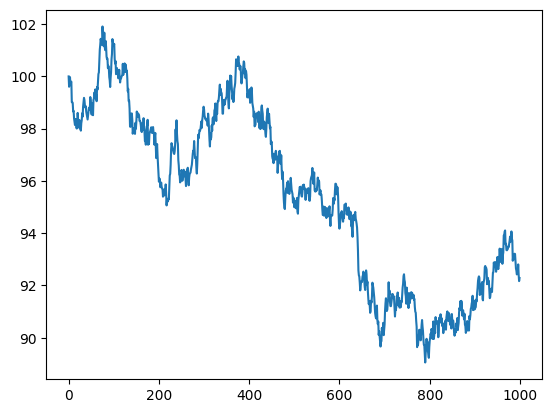

In [15]:
plt.plot(myData[2])

In [16]:
total_variation = get_total_varitation(myData[2])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[2])
print("Quadratic Variation: ", quadratic_variation)

total_variation_arr[2] = total_variation
quadratic_variation_arr[2] = quadratic_variation

Total Variation:  213.76330657466752
Quadratic Variation:  70.87366517635459


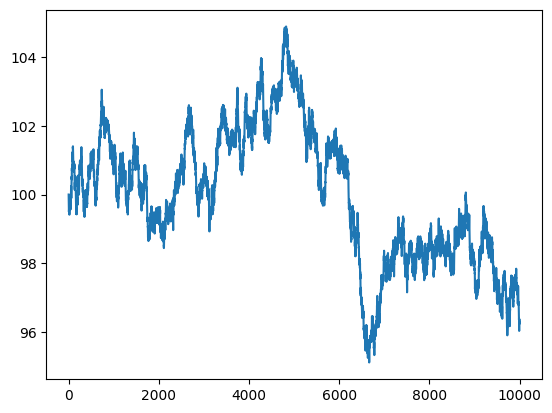

In [17]:
plt.plot(myData[3])

In [18]:
total_variation = get_total_varitation(myData[3])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[3])
print("Quadratic Variation: ", quadratic_variation)

total_variation_arr[3] = total_variation
quadratic_variation_arr[3] = quadratic_variation

Total Variation:  717.7061330979428
Quadratic Variation:  80.8116479328394


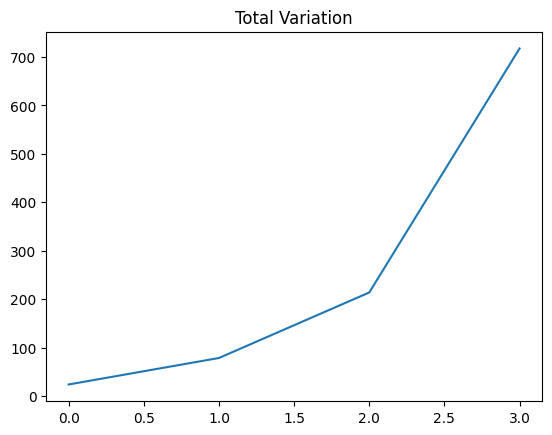

In [19]:
plt.plot(total_variation_arr)
plt.title("Total Variation")
plt.show()

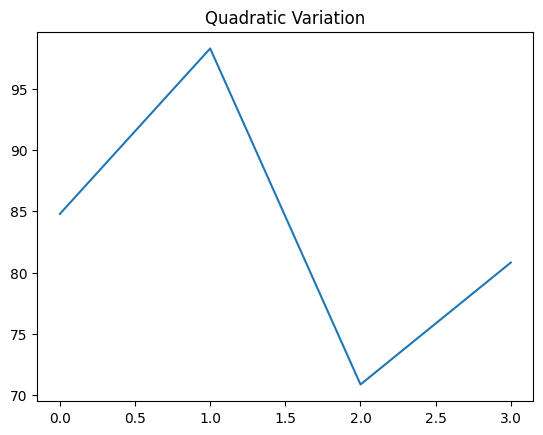

In [20]:
plt.plot(quadratic_variation_arr)
plt.title("Quadratic Variation")
plt.show()

## Variation Results 

#### The total variation is an increasing function. This is converging to infinity. 

#### The quadratic variation is not converging to t. 

#### These results are not as expected. The quadratic variation is incorrect. 

## Variation of Trig Functions

In [21]:
from scipy import integrate

In [22]:
def my_function(x):
    
    return np.abs(np.cos(x))

In [23]:
x = np.linspace(0, 1, N)
y1 = my_function(x)
integral = integrate.simpson(y1, x)

print("Integral: ", integral)

Integral:  0.8414709848078322


In [24]:
T = 1
dt = np.array([0.1, 0.01, 0.001, 0.0001])

In [25]:
L = len(dt)
myData = []

for i in range(L):
    
    n = int(T / dt[i])
    discrete = np.zeros(n)
    start = 0
    
    for j in range(1, n):
        discrete[j] = np.sin(start)
        start += dt[i]
    
    myData.append(discrete)

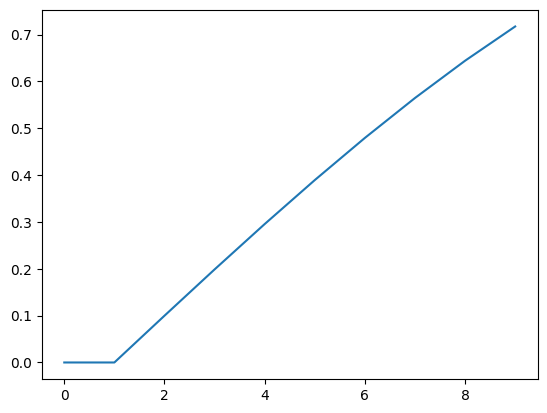

In [26]:
plt.plot(myData[0])

In [27]:
total_variation = get_total_varitation(myData[0])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[0])
print("Quadratic Variation: ", quadratic_variation)

Total Variation:  0.7173560908995227
Quadratic Variation:  0.06497686314743864


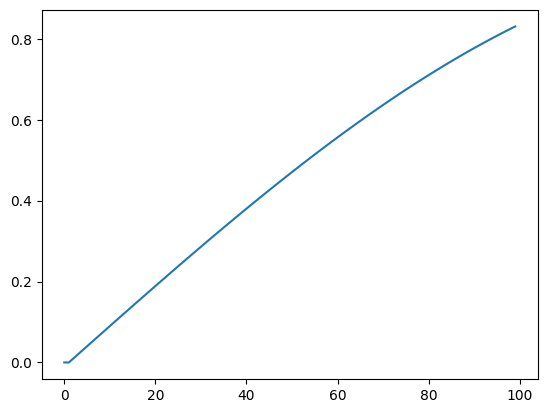

In [28]:
plt.plot(myData[1])

In [29]:
total_variation = get_total_varitation(myData[1])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[1])
print("Quadratic Variation: ", quadratic_variation)

Total Variation:  0.8304973704919708
Quadratic Variation:  0.007213007244205972


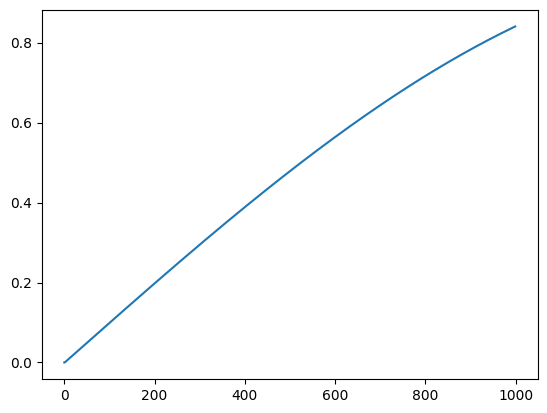

In [30]:
plt.plot(myData[2])

In [31]:
total_variation = get_total_varitation(myData[2])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[2])
print("Quadratic Variation: ", quadratic_variation)

Total Variation:  0.8403886979751549
Quadratic Variation:  0.0007267386612357085


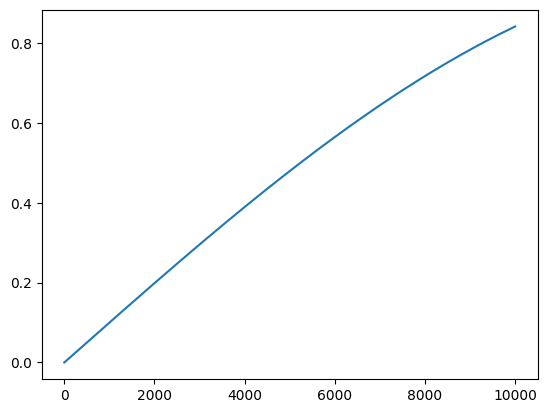

In [32]:
plt.plot(myData[3])

In [33]:
total_variation = get_total_varitation(myData[3])
print("Total Variation: ", total_variation)

quadratic_variation = get_quadratic_variation(myData[3])
print("Quadratic Variation: ", quadratic_variation)

Total Variation:  0.8413629075179729
Quadratic Variation:  7.272659529758149e-05


## Variation Results 

#### The total variation is converging to the integral of the function. 

#### The quadratic variation is converging to zero. 

#### These results are as expected. 

## Ito Formula

## Compute Integral of Differentiable Function

In [34]:
T = 1
N = 10000

In [35]:
def ft(t):
    
    return t**2

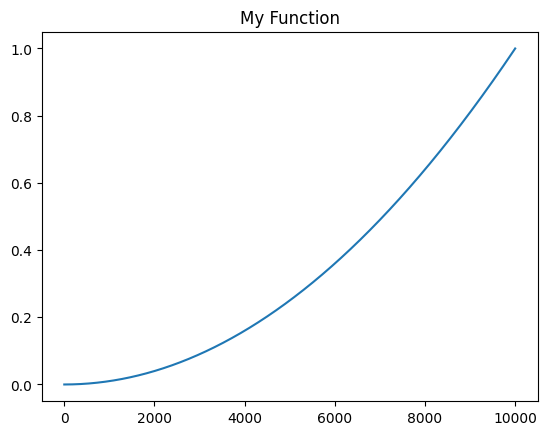

In [36]:
integral = 0
X = np.linspace(0, T, N)
Y = ft(X)

plt.plot(Y)
plt.title("My Function")
plt.show()

In [37]:
for i in range(1, N):
    
    integral += Y[i] * (X[i] - X[i - 1])
    
print("Integral: ", integral)

Integral:  0.33338334000083325


## Results 

#### This converges to the integral

## Generate Brownian Motion Paths

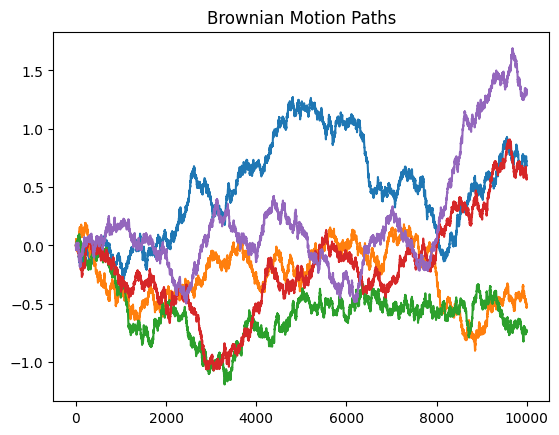

In [38]:
bm = []

for i in range(5):
    
    dt = T / N
    Wt = np.zeros(N)
    rv = np.random.normal(0, 1, N)
    Wt[0] = 0
    
    for j in range(1, N):
            
        Wt[j] = Wt[j - 1] + rv[j] * np.sqrt(dt)
        
    bm.append(Wt)
        
plt.plot(bm[0])
plt.plot(bm[1])
plt.plot(bm[2])
plt.plot(bm[3])
plt.plot(bm[4])
plt.title("Brownian Motion Paths")
plt.show()

## Compute Integral with Left Hand Side

In [39]:
for i in range(5):
    
    integral = 0
    
    for j in range(1, N):
        
        # Integral (W_s * dW_s)
        integral += bm[i][j] * (bm[i][j] - bm[i][j - 1])
        
    # 1/2 (W_t^2 - t)
    sum1 = 0.5 * (bm[i][-1]**2 - T)
        
    print("Ito Integral: ", integral)
    print("Integral 1: ", sum1)
    print("\n")

Ito Integral:  0.7316931928950493
Integral 1:  -0.2663109637393525


Ito Integral:  0.634541068581809
Integral 1:  -0.360064218818636


Ito Integral:  0.7697299675224333
Integral 1:  -0.2279393488860284


Ito Integral:  0.6655616006465274
Integral 1:  -0.33577958084329296


Ito Integral:  1.3608282553690847
Integral 1:  0.37133523482058906




## Compare Results 

#### The results do not match

## Compute Integral with Midpoint

In [40]:
for i in range(5):
    
    midpoint = 0
    
    for j in range(N - 1):
        
        midpoint += 0.5 * (bm[i][j + 1] + bm[i][j]) * (bm[i][j + 1] - bm[i][j])
    
    sum1 = 0.5 * (bm[i][-1]**2 - T)
    sum2 = 0.5 * bm[i][-1]**2
        
    print("Midpoint Integral: ", midpoint)
    print("Integral 1: ", sum1)
    print("Integral 2: ", sum2)
    print("\n")

Midpoint Integral:  0.2336890362606468
Integral 1:  -0.2663109637393525
Integral 2:  0.23368903626064755


Midpoint Integral:  0.13993578118136418
Integral 1:  -0.360064218818636
Integral 2:  0.13993578118136402


Midpoint Integral:  0.27206065111397154
Integral 1:  -0.2279393488860284
Integral 2:  0.2720606511139716


Midpoint Integral:  0.16422041915670624
Integral 1:  -0.33577958084329296
Integral 2:  0.16422041915670704


Midpoint Integral:  0.8713352348205897
Integral 1:  0.37133523482058906
Integral 2:  0.871335234820589




## Compare Results 

#### The midpoint method matches the second computation. 

## Compute Integral for Sin(t)

In [41]:
X = np.linspace(0, 1, N)

In [42]:
for i in range(5):
    
    integral = 0
     
    for j in range(1, N):
        
        integral += np.sin(X[j]) * (np.sin(X[j]) - np.sin(X[j - 1]))
    
    sum1 = 0.5 * (np.sin(X[-1])**2 - T)
        
    print("Ito Integral: ", integral)
    print("Integral 1: ", sum1)
    print("\n")

Ito Integral:  0.3540730789915947
Integral 1:  -0.1459632908632144


Ito Integral:  0.3540730789915947
Integral 1:  -0.1459632908632144


Ito Integral:  0.3540730789915947
Integral 1:  -0.1459632908632144


Ito Integral:  0.3540730789915947
Integral 1:  -0.1459632908632144


Ito Integral:  0.3540730789915947
Integral 1:  -0.1459632908632144




## Compare Results 

#### These results do not match. 

In [43]:
for i in range(5):
    
    integral = 0
    
    for j in range(N - 1):
        
        integral += 0.5 * (np.sin(X[j + 1]) + np.sin(X[j])) * (np.sin(X[j + 1]) - np.sin(X[j]))
    
    sum1 = 0.5 * (np.sin(X[-1])**2 - T)
    sum2 = 0.5 * (np.sin(X[-1])**2)
        
    print("Ito Integral: ", integral)
    print("Integral 1: ", sum1)
    print("Integral 2: ", sum2)
    print("\n")

Ito Integral:  0.3540367091367854
Integral 1:  -0.1459632908632144
Integral 2:  0.3540367091367856


Ito Integral:  0.3540367091367854
Integral 1:  -0.1459632908632144
Integral 2:  0.3540367091367856


Ito Integral:  0.3540367091367854
Integral 1:  -0.1459632908632144
Integral 2:  0.3540367091367856


Ito Integral:  0.3540367091367854
Integral 1:  -0.1459632908632144
Integral 2:  0.3540367091367856


Ito Integral:  0.3540367091367854
Integral 1:  -0.1459632908632144
Integral 2:  0.3540367091367856




## Compare Methods 

#### The "Ito Integral" matches the second computation

## Ito Integral

In [44]:
def ft(t):
    
    return np.exp(t)

In [45]:
T = 1
N = 10000
rv = np.random.normal(0, 1, N)
t = np.linspace(0, 1, N)
Y = ft(X)

b_motion = np.zeros(N)
ito_process = np.zeros(N)

In [46]:
b_motion[0] = 0

for i in range(1, N):
    
    b_motion[i] = b_motion[i - 1] + rv[i]

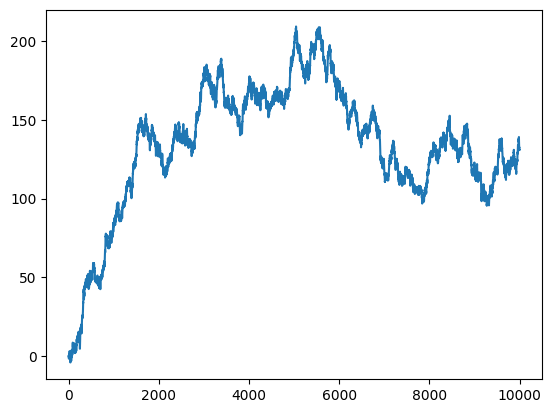

In [47]:
plt.plot(b_motion)
plt.show()

In [48]:
for i in range(1, N):
    
    ito_process[i] = Y[i] * (b_motion[i] - b_motion[i - 1])

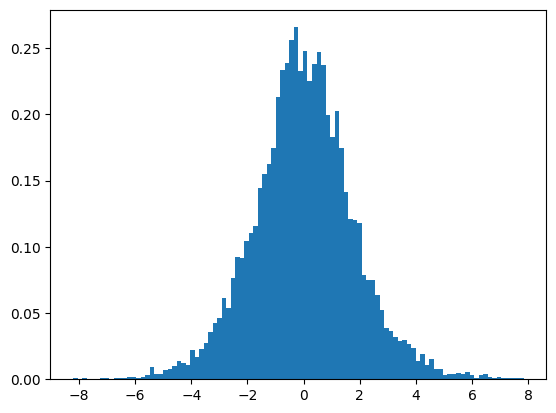

In [49]:
plt.hist(ito_process, density = True, bins = 100)
plt.show()

In [50]:
# Lets Check the Results 
std = np.std(ito_process)
print("Standard Deviation of Ito Process: ", std)

Standard Deviation of Ito Process:  1.7985137640974744


## Results 

#### The time series has a normal distribution. 